### 특징 벡터의 파라미터로 들어갈 features (단일값 산출이 가능한 것 위주로 선정)
- **MFCC**
- **tempo**(global tempo)
- **spectral centroid**
- **spectral roll-off**
- spectral valley => zero-crossing rate로 대체
- spectral spread (분산 범위)(구하는 법 아직 못찾음)
- spectral flux (구하는 법 아직 못찾음)

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

# 1. 벡터 차원 축소
## 1) Feature Selection

In [2]:
df = pd.read_csv("music.csv")#; df.index.name = 'record' 뭔지몰겠음
cols = ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mel1','mel2','mel3','mel4','mel5','mel6','mel7','mel8','mel9','mel10','cent1','cent2','cent3','cent4','cent5','cent6','cent7','cent8','cent9','cent10','cont1','cont2','cont3','cont4','cont5','cont6','cont7','tempo1','tempo2','tempo3','tempo4','tempo5','tempo6','tempo7','tempo8','tempo9','tempo10']

x = df[cols]
y = df['category']

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x,y)

print(cols)
print(rfe.ranking_)

['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mel1', 'mel2', 'mel3', 'mel4', 'mel5', 'mel6', 'mel7', 'mel8', 'mel9', 'mel10', 'cent1', 'cent2', 'cent3', 'cent4', 'cent5', 'cent6', 'cent7', 'cent8', 'cent9', 'cent10', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']
[42 44 36 46 22 40 20  9 34 45 28 27 26 25 24 23 15 33 21 16 32 19  5  3
  4  1 35 43  1  2 39 13  6  8  7 17 41 38 14 12 11 30 10 18 29 37 31]


## 2) PCA

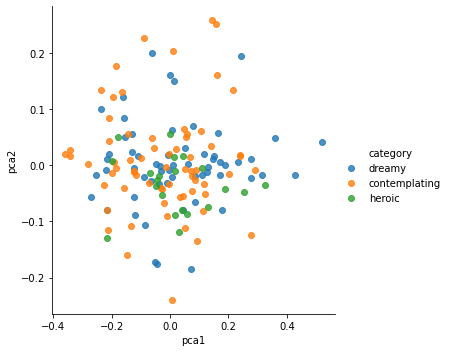

In [5]:
pca1 = PCA(n_components=2)
# Fit the model with X and apply the dimensionality reduction on X.
out_pca1 = pca1.fit_transform(df[['cent6','cent9',]])
df_pca1 = pd.DataFrame(data = out_pca1, columns=['pca1','pca2'])
new_df_pca1 = pd.concat([df_pca1, df[['category']]], axis=1)
sns.lmplot(x='pca1', y='pca2', hue='category', data=new_df_pca1, fit_reg=False)

In [4]:
print(pca1.explained_variance_ratio_)

[9.99927087e-01 7.29128496e-05]


In [11]:
pca2 = PCA(n_components=7)
out_pca2 = pca2.fit_transform(df[['cent6','cent9','cent10','cent3', 'cent4', 'cent5','cont3',]])
df_pca2 = pd.DataFrame(data = out_pca2)
new_df_pca2 = pd.concat([df_pca2, df[['category']]], axis=1)
#sns.lmplot(x='pca1', y='pca2', hue='category', data=new_df_pca2, fit_reg=False)

In [7]:
#세번째 클러스터링
pca3 = PCA()
out_pca3 = pca3.fit_transform(x)
df_pca3 = pd.DataFrame(data = out_pca3) #, columns=['pca1','pca2']
#new_df_pca1 = pd.concat([df_pca1, df[['category']]], axis=1)
#sns.lmplot(x='pca1', y='pca2', hue='category', data=new_df_pca1, fit_reg=False)

## 3) Sequential Feature Selector

In [8]:
knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn, 
           k_features=7, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.3s finished

[2020-07-04 05:52:36] Features: 1/7 -- score: 0.6959459459459459[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.3s finished

[2020-07-04 05:52:36] Features: 2/7 -- score: 0.722972972972973[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished

[2020-07-04 05:52:37] Features: 3/7 -- score: 0.7297297297297297[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [9]:
print(sfs1.subsets_)
print(sfs1.k_feature_idx_)

{1: {'feature_idx': (8,), 'cv_scores': array([0.69594595]), 'avg_score': 0.6959459459459459, 'feature_names': ('mfcc9',)}, 2: {'feature_idx': (8, 29), 'cv_scores': array([0.72297297]), 'avg_score': 0.722972972972973, 'feature_names': ('mfcc9', 'cent10')}, 3: {'feature_idx': (8, 23, 29), 'cv_scores': array([0.72972973]), 'avg_score': 0.7297297297297297, 'feature_names': ('mfcc9', 'cent4', 'cent10')}, 4: {'feature_idx': (8, 15, 23, 29), 'cv_scores': array([0.70945946]), 'avg_score': 0.7094594594594594, 'feature_names': ('mfcc9', 'mel6', 'cent4', 'cent10')}, 5: {'feature_idx': (8, 15, 19, 23, 29), 'cv_scores': array([0.73648649]), 'avg_score': 0.7364864864864865, 'feature_names': ('mfcc9', 'mel6', 'mel10', 'cent4', 'cent10')}, 6: {'feature_idx': (5, 8, 15, 19, 23, 29), 'cv_scores': array([0.74324324]), 'avg_score': 0.7432432432432432, 'feature_names': ('mfcc6', 'mfcc9', 'mel6', 'mel10', 'cent4', 'cent10')}, 7: {'feature_idx': (5, 8, 9, 15, 19, 23, 29), 'cv_scores': array([0.78378378]), 'a

In [12]:
pca4 = PCA(n_components=7)
out_pca4 = pca4.fit_transform(df[['mfcc6', 'mfcc9', 'mfcc10', 'mel6', 'mel10', 'cent4', 'cent10']])
df_pca4 = pd.DataFrame(data = out_pca4)
new_df_pca4 = pd.concat([df_pca4, df[['category']]], axis=1)

# 2. 클러스터링
### K-means

In [43]:
def counting(labellist):
    print(labellist)
    labellist = list(labellist)
    num0, num1, num2 = 0,0,0
    for i in labellist[0:60]:
        if i==0:
            num0+=1
        elif i==1:
            num1+=1
        else:
            num2+=1
    print("dreamy: ","num0 = ", num0,"    num1 = ", num1,"   num2 = ", num2)
    
    num0, num1, num2 = 0,0,0
    for i in labellist[60:127]:
        if i==0:
            num0+=1
        elif i==1:
            num1+=1
        else:
            num2+=1
    print("contemplating: ","num0 = ", num0,"    num1 = ", num1,"   num2 = ", num2)
    
    num0, num1, num2 = 0,0,0
    for i in labellist[127:]:
        if i==0:
            num0+=1
        elif i==1:
            num1+=1
        else:
            num2+=1
    print("heroic: ","num0 = ", num0,"    num1 = ", num1,"   num2 = ", num2)

In [44]:
k_clus1 = KMeans(n_clusters=3, tol=0.004, max_iter=300) #or 조건이라고 한다.
#clus.fit(df.loc[:,'tempo':'mfcc10'])
# Compute k-means clustering.
k_clus1.fit(df_pca1)
df_pca1['K-Means Cluster Labels'] = k_clus1.labels_
#print(df['K-Means Cluster Labels'][:5].tolist())
print(df_pca1['K-Means Cluster Labels'])
print("\n")
#print(k_clus1.labels_)
counting(k_clus1.labels_)

0      2
1      1
2      2
3      2
4      1
      ..
143    2
144    2
145    2
146    1
147    2
Name: K-Means Cluster Labels, Length: 148, dtype: int32


[2 1 2 2 1 1 0 2 2 0 0 1 2 0 0 0 2 1 0 0 0 1 2 0 2 2 2 2 1 0 0 2 0 2 2 1 1
 0 2 2 1 1 1 1 0 0 2 2 2 1 2 2 2 0 2 0 2 1 2 2 0 1 0 2 1 2 1 1 2 0 0 0 2 0
 2 2 0 2 2 2 2 0 2 2 0 2 2 1 2 2 1 2 0 0 2 0 2 2 0 0 0 2 1 1 2 0 2 1 2 0 1
 2 2 2 0 0 0 2 2 0 0 2 0 0 0 0 2 1 0 2 0 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 1 2]
dreamy:  num0 =  18     num1 =  15    num2 =  27
contemplating:  num0 =  26     num1 =  10    num2 =  31
heroic:  num0 =  3     num1 =  3    num2 =  15


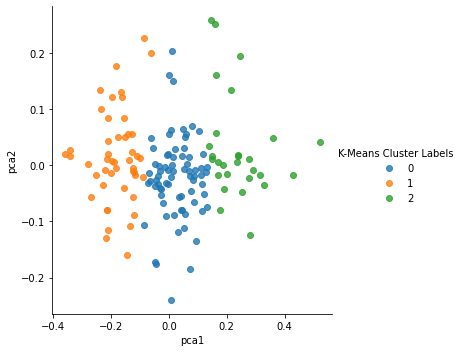

In [14]:
sns.lmplot(x='pca1', y='pca2', hue='K-Means Cluster Labels', data=df_pca1,fit_reg=False)

In [45]:
k_clus2 = KMeans(n_clusters=3, tol=0.004, max_iter=300)
#clus.fit(df.loc[:,'tempo':'mfcc10'])
# Compute k-means clustering.
k_clus2.fit(df_pca2)
df_pca2['K-Means Cluster Labels'] = k_clus2.labels_
#print(df['K-Means Cluster Labels'][:5].tolist())
print(df_pca2['K-Means Cluster Labels'])
print("\n")
counting(k_clus2.labels_)

0      1
1      0
2      1
3      0
4      0
      ..
143    0
144    0
145    0
146    0
147    0
Name: K-Means Cluster Labels, Length: 148, dtype: int32


[1 0 1 0 0 0 0 1 1 0 2 0 2 2 0 1 0 0 0 2 0 0 1 0 2 1 0 1 0 1 0 0 1 0 1 0 2
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 2 1 1 0 1 1 0 1 2 0 1 2 1 0 1 1 1 2 1 2 1 0
 1 0 2 1 0 1 2 1 1 1 0 1 2 0 1 1 2 1 1 1 1 1 1 0 1 0 1 2 1 1 1 1 1 0 1 1 2
 1 1 1 2 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
dreamy:  num0 =  30     num1 =  23    num2 =  7
contemplating:  num0 =  18     num1 =  38    num2 =  11
heroic:  num0 =  18     num1 =  2    num2 =  1


In [46]:
k_clus3 = KMeans(n_clusters=3, tol=0.004, max_iter=300)
#clus.fit(df.loc[:,'tempo':'mfcc10'])
# Compute k-means clustering.
k_clus3.fit(df_pca3)
df_pca3['K-Means Cluster Labels'] = k_clus3.labels_
#print(df['K-Means Cluster Labels'][:5].tolist())
print(df_pca3['K-Means Cluster Labels'])
print("\n")
counting(k_clus3.labels_)

0      0
1      0
2      0
3      0
4      0
      ..
143    0
144    0
145    0
146    0
147    0
Name: K-Means Cluster Labels, Length: 148, dtype: int32


[0 0 0 0 0 0 0 1 0 0 1 0 2 2 0 0 0 0 0 1 0 0 0 0 2 2 1 0 0 1 0 0 1 0 0 0 2
 0 0 0 0 0 0 0 1 0 2 1 0 0 0 1 1 1 0 1 1 0 0 2 2 0 1 1 1 2 0 0 1 2 1 1 1 1
 1 0 2 1 0 2 0 0 0 0 1 1 2 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 2 1 1
 0 0 1 1 1 0 0 0 1 0 0 2 1 1 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
dreamy:  num0 =  40     num1 =  13    num2 =  7
contemplating:  num0 =  28     num1 =  31    num2 =  8
heroic:  num0 =  20     num1 =  0    num2 =  1


In [47]:
k_clus4 = KMeans(n_clusters=3, tol=0.004, max_iter=300)
#clus.fit(df.loc[:,'tempo':'mfcc10'])
# Compute k-means clustering.
k_clus4.fit(df_pca4)
df_pca4['K-Means Cluster Labels'] = k_clus4.labels_
#print(df['K-Means Cluster Labels'][:5].tolist())
print(df_pca4['K-Means Cluster Labels'])
print("\n")
counting(k_clus4.labels_)

0      0
1      0
2      0
3      0
4      2
      ..
143    0
144    1
145    0
146    0
147    0
Name: K-Means Cluster Labels, Length: 148, dtype: int32


[0 0 0 0 2 0 0 1 2 0 2 0 1 1 0 0 0 0 0 2 0 0 2 0 1 2 2 0 0 0 2 0 2 0 0 2 1
 2 0 0 0 0 0 0 2 0 1 2 0 0 0 2 2 2 0 1 2 0 0 1 2 0 2 2 0 1 2 0 2 1 1 2 2 2
 2 2 1 0 0 1 0 0 0 0 2 0 1 0 0 2 2 2 0 2 0 2 0 2 0 0 1 2 1 0 0 2 2 0 1 2 2
 0 0 0 1 1 2 0 0 2 0 0 1 1 2 2 2 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
dreamy:  num0 =  35     num1 =  8    num2 =  17
contemplating:  num0 =  27     num1 =  13    num2 =  27
heroic:  num0 =  18     num1 =  2    num2 =  1


한줄에 37개 데이터
heroic: 21개 데이터 중 1개 데이터 제외하고 모두 같은 레이블로 됨 와 도랏네
dreamy: 60개 데이터 중 ...거의다 0으로 됐는데?
contemplating:

### Agglomerative clustering

0      0
1      2
2      0
3      0
4      0
      ..
143    0
144    0
145    0
146    2
147    0
Name: HCA Cluster Labels, Length: 148, dtype: int64
[0 2 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 2 0 1 1 2 0 1 0 0 0 0 0 1 1 0 1 0 0 0 2
 1 0 0 0 2 0 2 1 1 0 0 0 2 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 2 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 2 0 0 2 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 2 0 1 0
 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 2 0]
dreamy:  num0 =  36     num1 =  17    num2 =  7
contemplating:  num0 =  38     num1 =  25    num2 =  4
heroic:  num0 =  16     num1 =  3    num2 =  2


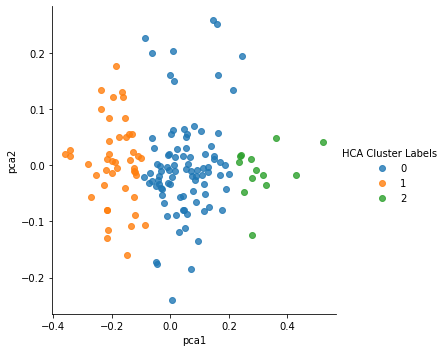

In [48]:
# linkage{“ward”, “complete”, “average”, “single”}
# Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
ag_clus1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# clus.fit(df.loc[:,'tempo':'mfcc10'])
new_df_pca1 = df_pca1.loc[:,'pca1':'pca2']
ag_clus1.fit(new_df_pca1)
new_df_pca1['HCA Cluster Labels'] = ag_clus1.labels_
print(new_df_pca1['HCA Cluster Labels'])
counting(ag_clus1.labels_)
sns.lmplot(x='pca1',y='pca2',hue='HCA Cluster Labels',data=new_df_pca1,fit_reg=False)

In [49]:
ag_clus2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# clus.fit(df.loc[:,'tempo':'mfcc10'])
#new_df_pca2 = df_pca2.loc[:,'pca1':'pca2']
ag_clus2.fit(df_pca2)
df_pca2['HCA Cluster Labels'] = ag_clus2.labels_
print(df_pca2['HCA Cluster Labels'])
counting(ag_clus2.labels_)
#sns.lmplot(x='pca1',y='pca2',hue='HCA Cluster Labels',data=new_df_pca2,fit_reg=False)

0      2
1      0
2      2
3      0
4      0
      ..
143    0
144    0
145    0
146    0
147    0
Name: HCA Cluster Labels, Length: 148, dtype: int64
[2 0 2 0 0 0 0 2 2 0 1 0 1 1 0 2 0 0 0 1 0 0 2 0 1 2 0 2 0 2 0 0 2 0 2 0 1
 2 0 2 0 0 0 2 2 0 0 0 2 2 0 2 1 2 2 0 2 2 0 2 1 0 2 1 2 0 2 2 2 1 2 1 2 0
 2 0 1 2 0 2 1 2 2 2 0 2 1 0 2 2 1 2 2 2 2 2 2 0 2 0 2 1 2 2 2 2 2 0 2 2 1
 2 2 2 1 2 2 0 0 0 0 0 2 2 0 0 0 0 0 0 1 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
dreamy:  num0 =  30     num1 =  7    num2 =  23
contemplating:  num0 =  18     num1 =  11    num2 =  38
heroic:  num0 =  18     num1 =  1    num2 =  2


In [50]:
ag_clus3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
#del df_pca3['K-Means Cluster Labels']
#new_df_pca1 = df_pca1[cols]
ag_clus3.fit(df_pca3)
df_pca3['HCA Cluster Labels'] = ag_clus3.labels_
print(df_pca3['HCA Cluster Labels'])
counting(ag_clus3.labels_)
#sns.lmplot(x='mfcc2',y='mel3',hue='HCA Cluster Labels',data=new_df_pca1,fit_reg=False)

0      2
1      2
2      2
3      2
4      2
      ..
143    2
144    1
145    1
146    2
147    2
Name: HCA Cluster Labels, Length: 148, dtype: int64
[2 2 2 2 2 2 2 1 1 2 1 2 0 0 2 1 2 2 2 0 1 2 1 2 0 0 1 2 2 1 2 2 0 2 2 2 0
 1 2 2 1 2 2 2 0 1 0 1 2 2 1 1 1 1 2 1 1 2 2 0 0 2 0 0 1 0 1 2 1 0 0 0 1 0
 1 2 0 1 2 0 1 2 2 2 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 2 1 0 1 0 2 1 1 2 0 1 0
 2 2 1 0 0 1 2 2 1 2 2 0 1 1 1 1 2 2 2 0 1 2 2 1 2 2 2 1 2 2 2 2 2 1 1 2 2]
dreamy:  num0 =  10     num1 =  18    num2 =  32
contemplating:  num0 =  21     num1 =  30    num2 =  16
heroic:  num0 =  1     num1 =  5    num2 =  15


In [51]:
ag_clus4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
#del df_pca3['K-Means Cluster Labels']
#new_df_pca1 = df_pca1[cols]
ag_clus4.fit(df_pca4)
df_pca4['HCA Cluster Labels'] = ag_clus4.labels_
print(df_pca4['HCA Cluster Labels'])
counting(ag_clus3.labels_)
#sns.lmplot(x='mfcc2',y='mel3',hue='HCA Cluster Labels',data=new_df_pca1,fit_reg=False)

0      0
1      0
2      0
3      0
4      0
      ..
143    0
144    1
145    0
146    0
147    0
Name: HCA Cluster Labels, Length: 148, dtype: int64
[2 2 2 2 2 2 2 1 1 2 1 2 0 0 2 1 2 2 2 0 1 2 1 2 0 0 1 2 2 1 2 2 0 2 2 2 0
 1 2 2 1 2 2 2 0 1 0 1 2 2 1 1 1 1 2 1 1 2 2 0 0 2 0 0 1 0 1 2 1 0 0 0 1 0
 1 2 0 1 2 0 1 2 2 2 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 2 1 0 1 0 2 1 1 2 0 1 0
 2 2 1 0 0 1 2 2 1 2 2 0 1 1 1 1 2 2 2 0 1 2 2 1 2 2 2 1 2 2 2 2 2 1 1 2 2]
dreamy:  num0 =  10     num1 =  18    num2 =  32
contemplating:  num0 =  21     num1 =  30    num2 =  16
heroic:  num0 =  1     num1 =  5    num2 =  15


### Spectral Clustering

0      0
1      0
2      1
3      1
4      0
      ..
143    1
144    1
145    1
146    0
147    1
Name: Spectral Cluster Labels, Length: 148, dtype: int32
[0 0 1 1 0 0 2 1 1 2 2 0 1 2 2 2 1 0 2 2 2 0 0 2 1 1 1 1 0 2 2 1 2 1 1 0 0
 2 1 1 0 0 0 0 2 2 1 1 1 0 1 1 1 2 1 2 1 0 0 1 2 0 2 1 0 1 0 0 1 2 2 2 1 2
 0 1 2 1 1 1 1 2 1 1 2 1 1 0 1 1 0 1 2 2 1 2 1 1 2 2 2 1 0 0 1 2 1 0 1 2 0
 1 1 1 2 2 2 1 1 2 2 1 2 2 2 2 1 0 2 1 2 1 1 1 1 1 1 0 1 1 0 1 2 1 1 1 0 1]
dreamy:  num0 =  18     num1 =  24    num2 =  18
contemplating:  num0 =  11     num1 =  30    num2 =  26
heroic:  num0 =  4     num1 =  14    num2 =  3


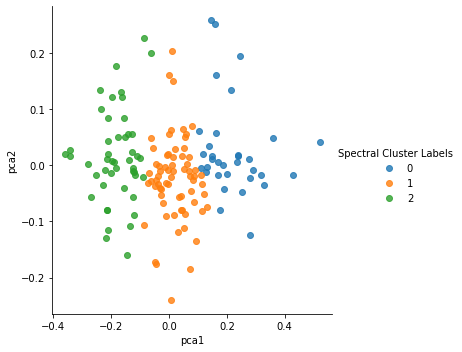

In [52]:
sp_clus1 = SpectralClustering(n_clusters=3, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors', n_neighbors=10)
temp_df1 = df_pca1.loc[:,'pca1':'pca2']
sp_clus1.fit(temp_df1)
temp_df1['Spectral Cluster Labels'] = sp_clus1.labels_
print(temp_df1['Spectral Cluster Labels'])
counting(sp_clus1.labels_)
sns.lmplot(x='pca1',y='pca2',hue='Spectral Cluster Labels',data=temp_df1,fit_reg=False)

In [53]:
sp_clus2 = SpectralClustering(n_clusters=3, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors', n_neighbors=10)
#del df_pca1['HCA Cluster Labels']
sp_clus2.fit(df_pca2)
df_pca2['Spectral Cluster Labels'] = sp_clus2.labels_
#sns.lmplot(x='pca1',y='pca2',hue='Spectral Cluster Labels',data=temp_df1,fit_reg=False)
print(df_pca2['Spectral Cluster Labels'])
counting(sp_clus2.labels_)

0      1
1      1
2      0
3      1
4      1
      ..
143    1
144    2
145    2
146    1
147    2
Name: Spectral Cluster Labels, Length: 148, dtype: int32
[1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 2 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 0 1 2 2 0 1 2 1 1 0 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 2 0 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 2 1 2]
dreamy:  num0 =  12     num1 =  43    num2 =  5
contemplating:  num0 =  14     num1 =  50    num2 =  3
heroic:  num0 =  0     num1 =  14    num2 =  7


In [54]:
sp_clus3 = SpectralClustering(n_clusters=3, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors', n_neighbors=10)
#del df_pca1['HCA Cluster Labels']
sp_clus3.fit(df_pca3)
df_pca3['Spectral Cluster Labels'] = sp_clus3.labels_
#sns.lmplot(x='pca1',y='pca2',hue='Spectral Cluster Labels',data=temp_df1,fit_reg=False)
print(df_pca3['Spectral Cluster Labels'])
counting(sp_clus3.labels_)

0      0
1      0
2      0
3      2
4      0
      ..
143    2
144    0
145    0
146    0
147    2
Name: Spectral Cluster Labels, Length: 148, dtype: int32
[0 0 0 2 0 0 2 1 0 0 0 0 1 1 0 0 0 2 0 1 0 0 0 2 1 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 2 0 0 0 0 1 0 1 0 2 0 0 0 0 0 0 1 1 0 2 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 0 1 0 0 2 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 2 1 1 0 1 0 1 0 2 1 1 1
 0 0 0 1 1 0 2 2 0 0 0 1 1 0 0 0 2 0 0 1 0 2 2 0 0 2 2 0 0 0 2 2 2 0 0 0 2]
dreamy:  num0 =  39     num1 =  14    num2 =  7
contemplating:  num0 =  36     num1 =  26    num2 =  5
heroic:  num0 =  11     num1 =  1    num2 =  9


In [55]:
sp_clus4 = SpectralClustering(n_clusters=3, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors', n_neighbors=10)
#del df_pca1['HCA Cluster Labels']
sp_clus4.fit(df_pca4)
df_pca4['Spectral Cluster Labels'] = sp_clus4.labels_
#sns.lmplot(x='pca1',y='pca2',hue='Spectral Cluster Labels',data=temp_df1,fit_reg=False)
print(df_pca4['Spectral Cluster Labels'])
counting(sp_clus4.labels_)

0      0
1      1
2      1
3      1
4      0
      ..
143    1
144    2
145    1
146    0
147    1
Name: Spectral Cluster Labels, Length: 148, dtype: int32
[0 1 1 1 0 0 0 2 2 1 0 1 2 2 0 0 1 1 1 0 1 1 0 1 2 2 2 1 1 1 0 1 0 1 0 0 2
 2 1 1 1 0 1 1 0 1 2 0 0 1 0 0 0 2 1 2 2 1 1 2 2 1 2 2 0 2 0 1 2 2 2 0 0 0
 0 0 2 0 1 2 1 1 1 1 0 0 2 1 1 2 2 0 0 2 1 0 0 0 0 1 2 0 2 0 1 2 0 1 2 2 0
 0 1 1 2 2 0 1 1 2 0 0 2 2 0 0 0 1 0 0 2 1 1 1 1 0 1 1 1 0 1 1 1 1 2 1 0 1]
dreamy:  num0 =  20     num1 =  26    num2 =  14
contemplating:  num0 =  27     num1 =  17    num2 =  23
heroic:  num0 =  5     num1 =  14    num2 =  2


## clustering valuation(군집 모델 평가하기)

In [73]:
list1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

list2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

list3 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

list4 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

list5 = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

list6 = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


#K-means
print(adjusted_rand_score(list1, k_clus1.labels_))
print(fowlkes_mallows_score(list1, k_clus1.labels_))
print(normalized_mutual_info_score(list1, k_clus1.labels_))
print(adjusted_mutual_info_score(list1, k_clus1.labels_), end="\n\n")


print(adjusted_rand_score(list1, k_clus2.labels_))
print(fowlkes_mallows_score(list1, k_clus2.labels_))
print(normalized_mutual_info_score(list1, k_clus2.labels_))
print(adjusted_mutual_info_score(list1, k_clus2.labels_), end="\n\n")

print(adjusted_rand_score(list1, k_clus3.labels_))
print(fowlkes_mallows_score(list1, k_clus3.labels_))
print(normalized_mutual_info_score(list1, k_clus3.labels_))
print(adjusted_mutual_info_score(list1, k_clus3.labels_), end="\n\n")

print(adjusted_rand_score(list1, k_clus4.labels_))
print(fowlkes_mallows_score(list1, k_clus4.labels_))
print(normalized_mutual_info_score(list1, k_clus4.labels_))
print(adjusted_mutual_info_score(list1, k_clus4.labels_), end="\n\n\n\n")


# Agglomerative
print(adjusted_rand_score(list1, ag_clus1.labels_))
print(fowlkes_mallows_score(list1, ag_clus1.labels_))
print(normalized_mutual_info_score(list1, ag_clus1.labels_))
print(adjusted_mutual_info_score(list1, ag_clus1.labels_), end="\n\n")

print(adjusted_rand_score(list1, ag_clus2.labels_))
print(fowlkes_mallows_score(list1, ag_clus2.labels_))
print(normalized_mutual_info_score(list1, ag_clus2.labels_))
print(adjusted_mutual_info_score(list1, ag_clus2.labels_), end="\n\n")

print(adjusted_rand_score(list1, ag_clus3.labels_))
print(fowlkes_mallows_score(list1, ag_clus3.labels_))
print(normalized_mutual_info_score(list1, ag_clus3.labels_))
print(adjusted_mutual_info_score(list1, ag_clus3.labels_), end="\n\n")

print(adjusted_rand_score(list1, ag_clus4.labels_))
print(fowlkes_mallows_score(list1, ag_clus4.labels_))
print(normalized_mutual_info_score(list1, ag_clus4.labels_))
print(adjusted_mutual_info_score(list1, ag_clus4.labels_), end="\n\n\n\n")


# Spectral
print(adjusted_rand_score(list1, sp_clus1.labels_))
print(fowlkes_mallows_score(list1, sp_clus1.labels_))
print(normalized_mutual_info_score(list1, sp_clus1.labels_))
print(adjusted_mutual_info_score(list1, sp_clus1.labels_), end="\n\n")

print(adjusted_rand_score(list1, sp_clus2.labels_))
print(fowlkes_mallows_score(list1, sp_clus2.labels_))
print(normalized_mutual_info_score(list1, sp_clus2.labels_))
print(adjusted_mutual_info_score(list1, sp_clus2.labels_), end="\n\n")

print(adjusted_rand_score(list1, sp_clus3.labels_))
print(fowlkes_mallows_score(list1, sp_clus3.labels_))
print(normalized_mutual_info_score(list1, sp_clus3.labels_))
print(adjusted_mutual_info_score(list1, sp_clus3.labels_), end="\n\n")

print(adjusted_rand_score(list1, sp_clus4.labels_))
print(fowlkes_mallows_score(list1, sp_clus4.labels_))
print(normalized_mutual_info_score(list1, sp_clus4.labels_))
print(adjusted_mutual_info_score(list1, sp_clus4.labels_), end="\n\n")

-0.0076473830386165126
0.3757242654698549
0.02564954250508809
0.012051564721533414

0.05000230953361609
0.41940316901612396
0.08571599883071765
0.07254415753892929

0.02050219701984198
0.4283619796887308
0.10058441140393669
0.08697173564893197

-0.0012908896152050444
0.3941157446386223
0.056272859256343455
0.04272467357518572



-0.012881398249870148
0.4163992773456182
0.019637303616251874
0.004403161915686465

0.05000230953361609
0.41940316901612396
0.08571599883071765
0.07254415753892929

0.03928102573197978
0.39302182366595323
0.0712703963554734
0.05857343467659337

-0.011975476832455659
0.44974607571096864
0.04689472344154583
0.030736215745078215



-0.00021887572535816632
0.3708990317733316
0.02788558572917302
0.014553854259150633

0.021266440542055842
0.47660401835723554
0.0682793255202041
0.052869278981733527

0.03949716164132407
0.43081647243836785
0.07190172862132017
0.058273711530848774

0.014605971372133845
0.36956537261855776
0.0433607854567842
0.030468834486886046

